## **Akar Persamaan Non-Linier**
Berikut ini merupakan fungsi dasar dari metode yang dapat digunakan untuk mencari akar Persamaan non-Linier

**Pencarian Akar dengan Library**

Contoh Fungsi: f(x) = cos(x)-x

In [1]:
import numpy as np #memanggil library
from scipy import optimize #untuk menemukan nilai minimal suatu akar persamaan non-linear
f = lambda x: np.cos(x) - x #lambda seperti menuliskan fungsi f(x)
r = optimize.fsolve(f, -2)
print("r =",r)
# Verify the solution is a root
result = f(r)
print("result=", result)

r = [0.73908513]
result= [0.]


**Metode Bagi Dua**

In [ ]:
import numpy as np #panggil library
def my_bisection(f, a, b, e): #definisikan variabel my_bisection
  if np.sign(f(a)) == np.sign(f(b)): #cek apakah f(a) == f(b) untuk melihat ada akar atau tidak 
    raise Exception('Tidak ada akar pada interval a dan b')
  m = (a + b)/2 # rumus metode bagi dua untuk mencari nilai tengah dari a dan b 
  if np.abs(f(m)) < e: 
    return m
  elif np.sign(f(a)) == np.sign(f(m)): #kondisi dimana a = m
    return my_bisection(f, m, b, e)
  elif np.sign(f(b)) == np.sign(f(m)): #kondisi dimaana b = m 
    return my_bisection(f, a, m, e)

**Contoh Pencarian Akar dengan Metode Bagi Dua**

f(x)=x^2 - 2

In [ ]:
import numpy as np #panggil library
f = lambda x: x**2-2

r1 = my_bisection(f, 0, 2, 0.1)
print("r1 =", r1)
print("f(r1) =", f(r1))

r01 = my_bisection(f, 0, 2, 0.01)
print("r01 =", r01)
print("f(r01) =", f(r01))

r1 = 1.4375
f(r1) = 0.06640625
r01 = 1.4140625
f(r01) = -0.00042724609375


In [ ]:
import numpy as np #panggil library
f = lambda x: x**2-2
my_bisection(f, 2, 4, 0.01)

Exception: ignored

**Metode Newton-Raphson**

In [ ]:
import numpy as np #panggil library
def my_newton(f, df, x0, e):
# output is an estimation of the root of f
# using the Newton-Raphson method
# recursive implementation
  if abs(f(x0)) < e: 
    return x0
  else:
    return my_newton(f, df, x0 - f(x0)/df(x0), e)

**Contoh Pencarian Akar dengan Metode Bagi Dua**

f(x)=x^2 - 2

In [ ]:
f = lambda x: x**2-2
f_prime = lambda x: 2*x
estimate = my_newton(f, f_prime, 1.5, 1e-6)
print("estimate =", estimate)
print("sqrt(2) =",np.sqrt(2))

estimate = 1.4142135623746899
sqrt(2) = 1.4142135623730951


# **Latihan**

**No.1 **
Buatlah sebuah fungsi penyelesaian yang tepat baik dengan menggunakan metode Bagi Dua maupun Newton Raphson ketika 

a. f(x) = x^3 - 2x + 1

b. f(x) = e^x - x

**No 2**

Buatlah modifikasi fungsi ketika kriteria program berhenti adalah sudah mencapai pada iterasi ke-n baik untuk Bagi Dua maupun Newton Raphson

In [ ]:
#Jawaban No. 1 A 

#Metode Bagi Dua

from cmath import e
from tkinter import E

def f(x): #mendefinisikan fungsi f(x)
    return x**3-2*x+1 

def bagidua(a,b,e): #definisikan metode bagi dua
    step = 1
    print('\n\n===Metode Bagi Dua ===')
    condition = True #digunakan untuk menjalankan perulangan while dimana jika bernilai True, program akan terus berjalan
    while condition:
        c = (a + b)/2 #mencari titik tengah pada interval [a,b]
        print('Iterasi ke-%d, c = %0.6f dan f(c) = %0.6f' % (step, c, f(c))) #mencetak iterasi secara berulang ketika syarat terpenuhi

        #percabangan untuk menentukan nilai c menggantikan a atau b
        if f(a) * f(c) < 0:  
            b = c
        else:
            a = c
        
        step = step + 1 #step bertambah satu 
        condition = abs(f(c)) > e

    print('\nRequired Root is : %0.8f' % c) #mencetak hasil akar terakhir 

#bagian menginput data 
a = input('First Guess: ')
b = input('Second Guess: ')
e = input('Toleransi Error: ')

#mengkonversi input menjadi float 
a = float(a)
b = float(b)
e = float(e)


#mengecek apakah tebakan nilai diawal sudah benar atau belum dan membagi dua nilai tersebut 
if f(a) * f(b) > 0.0: #syarat untuk program selesai atau tidak bisa dilanjutkan 
    print('Coba dengan perkiraan value yang lain!')
else:
    bagidua(a,b,e) #perintah untuk jika f(a) * f(b) < 0


#Metode Newton Raphson 
def f(x): #mendefinisikan fungsi f(x)
    return x**3 - 2*x + 1

def g(x): #mendefinisikan fungsi g(x) yang merupakan turunan dari f(x)
    return 3*x**2 - 2


def newtonRaphson(x0,e,N):
    print('\n\n=== Metode Newton Raphson ===')
    step = 1
    flag = 1
    condition = True
    while condition:
        if g(x0) == 0.0: #f'(x) tidak boleh == 0 karena jika = 0 nanti tidak bisa melakukan tebakan akar
            print('Turunan tidak boleh = 0')
            break
        
        x1 = x0 - f(x0)/g(x0) #teorema Taylor yang digunakan rumus dalam metode Newton Raphson
        print('Iterasi ke-%d, x1 = %0.6f dan f(x1) = %0.6f' % (step, x1, f(x1))) #mencetak iterasi secara berulang ketika syarat terpenuhi
        x0 = x1 #x0 menjadi x1
        step = step + 1 #step bertambah 1 
        
        if step > N:
            flag = 0
            break
        
        condition = abs(f(x1)) > e
    
    if flag==1:
        print('\nRequired root is: %0.8f' % x1)
    else:
        print('\nNot Convergent.')


#bagian menginput data
x0 = input('Masukan Guess: ')
e = input('Toleransi Error: ')
N = input('Maximum Iterasi: ')

#mengkonversi input ke float dan/atau int 
x0 = float(x0)
e = float(e)
N = int(N)

newtonRaphson(x0,e,N) #mengerjakan perintah newtonRaphson 




===Metode Bagi Dua ===
Iterasi ke-1, c = 0.750000 dan f(c) = -0.078125
Iterasi ke-2, c = 0.625000 dan f(c) = -0.005859
Iterasi ke-3, c = 0.562500 dan f(c) = 0.052979
Iterasi ke-4, c = 0.593750 dan f(c) = 0.021820
Iterasi ke-5, c = 0.609375 dan f(c) = 0.007534
Iterasi ke-6, c = 0.617188 dan f(c) = 0.000724
Iterasi ke-7, c = 0.621094 dan f(c) = -0.002596
Iterasi ke-8, c = 0.619141 dan f(c) = -0.000943
Iterasi ke-9, c = 0.618164 dan f(c) = -0.000111
Iterasi ke-10, c = 0.617676 dan f(c) = 0.000306
Iterasi ke-11, c = 0.617920 dan f(c) = 0.000097

Required Root is : 0.61791992


=== Metode Newton Raphson ===
Iterasi ke-1, x1 = 1.500000 dan f(x1) = 1.375000
Iterasi ke-2, x1 = 1.210526 dan f(x1) = 0.352821
Iterasi ke-3, x1 = 1.063280 dan f(x1) = 0.075546
Iterasi ke-4, x1 = 1.008996 dan f(x1) = 0.009240
Iterasi ke-5, x1 = 1.000232 dan f(x1) = 0.000232
Iterasi ke-6, x1 = 1.000000 dan f(x1) = 0.000000

Required root is: 1.00000016


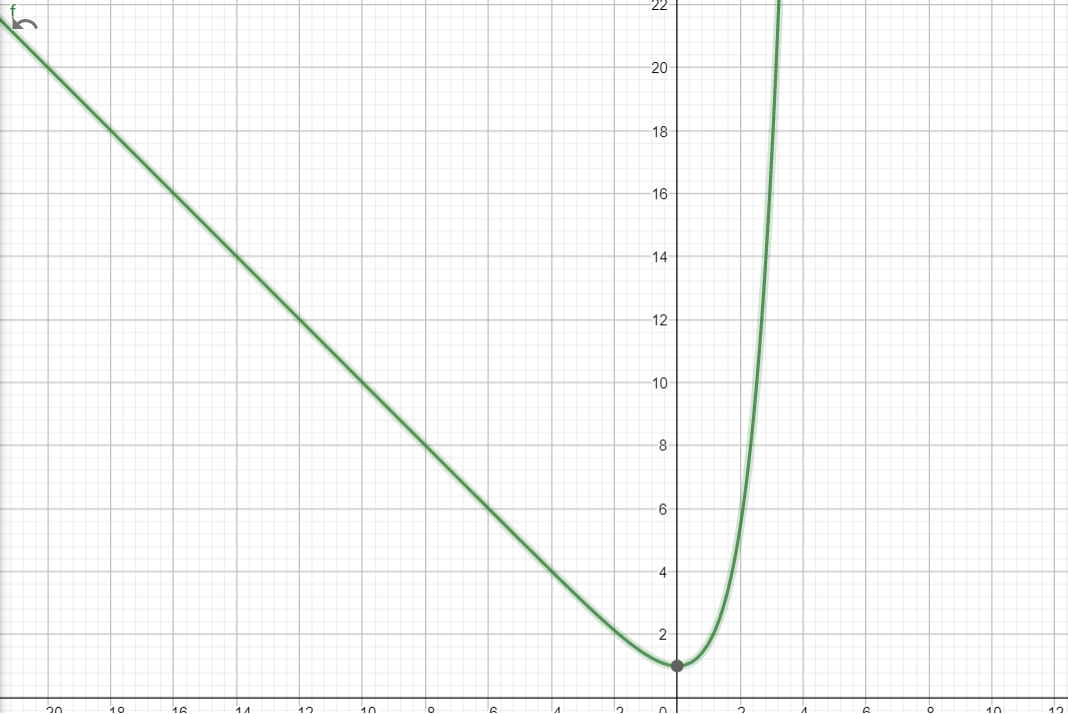


Bukti di atas menunjukkan bahwa:
Soal b tidak ada solusi karena grafik menunjukkan sumbu y selalu positif.